In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import gc

%matplotlib inline 

from sklearn.model_selection import train_test_split


import tensorflow as tf
tf.__version__


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters

'1.7.0'

In [2]:
np.random.seed(45)

In [3]:
#DATA_DIR = './input/'
#DATA_DIR = '../input/'
DATA_DIR = './'

In [4]:
print(os.listdir(DATA_DIR))

['train_sample.csv', 'test.csv', 'mnt', '.ipynb_checkpoints', 'Kaggle+-+Neural+Net+with+Sparse+Matrix.ipynb', 'traincsv.zip', 'train.csv']


In [5]:
ls -al 

total 9476228
drwxrwxr-x  4 ubuntu ubuntu       4096 May 10 16:49 ./
drwxr-xr-x 16 ubuntu ubuntu       4096 May 10 16:46 ../
drwxrwxr-x  2 ubuntu ubuntu       4096 May 10 16:48 .ipynb_checkpoints/
-rw-rw-r--  1 ubuntu ubuntu      29110 May 10 16:48 Kaggle+-+Neural+Net+with+Sparse+Matrix.ipynb
drwxrwxr-x  3 ubuntu ubuntu       4096 May 10 16:46 mnt/
-rw-rw-r--  1 ubuntu ubuntu  863271911 May  3 00:11 test.csv
-rw-rw-r--  1 ubuntu ubuntu 7537649302 Feb 16 04:02 train.csv
-rw-rw-r--  1 ubuntu ubuntu 1298591310 May 10 16:44 traincsv.zip
-rw-rw-r--  1 ubuntu ubuntu    4076438 May  3 00:11 train_sample.csv


In [6]:
SAMPLE_FILE = 'train_sample.csv'
TRAIN_FILE = 'train.csv'
TEST_FILE = 'test.csv'

In [7]:
dtypes = {
        'ip'            : 'uint32',
        'app'           : 'uint16',
        'device'        : 'uint16',
        'os'            : 'uint16',
        'channel'       : 'uint16',
        'is_attributed' : 'uint8',
        }

# Loading Data

In [10]:
%%time

#raw data mainly for the training model
'''
raw_data = pd.read_csv(DATA_DIR + TRAIN_FILE, dtype=dtypes,  \
                skiprows= range(1,9308569),nrows=60000000, \                
                usecols=['ip', 'app', 'device', 'os', 'channel', 'click_time', 'is_attributed'],\
                parse_dates=['click_time'])
'''

#training on 60M rows, one day of data.
raw_data = pd.read_csv(DATA_DIR + TRAIN_FILE, dtype=dtypes,  
                skiprows= range(1,9308569),nrows=60000000,                
                usecols=['ip', 'app', 'device', 'os', 'channel', 'click_time', 'is_attributed'],\
                parse_dates=['click_time'])






CPU times: user 59.5 s, sys: 1.59 s, total: 1min 1s
Wall time: 1min 1s


In [11]:
raw_data.head()

,ip,app,device,os,channel,click_time,is_attributed
0,70712,2,1,32,237,2017-11-07,0
1,45892,3,1,25,424,2017-11-07,0
2,37774,8,2,13,145,2017-11-07,0
3,41179,2,1,13,122,2017-11-07,0
4,83111,15,1,8,245,2017-11-07,0


In [12]:
raw_data.shape

(60000000, 7)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000000 entries, 0 to 59999999
Data columns (total 7 columns):
ip               uint32
app              uint16
device           uint16
os               uint16
channel          uint16
click_time       datetime64[ns]
is_attributed    uint8
dtypes: datetime64[ns](1), uint16(4), uint32(1), uint8(1)
memory usage: 1.2 GB


In [32]:
#del raw_data
#gc.collect()

In [14]:
raw_data.index

RangeIndex(start=0, stop=60000000, step=1)

In [15]:
#Check out the target column
cnt = raw_data['is_attributed'].value_counts()
cnt_percent = cnt/raw_data.shape[0]
cnt_percent

0    0.997454
1    0.002546
Name: is_attributed, dtype: float64

In [16]:
%%time
test_data = pd.read_csv(DATA_DIR + TEST_FILE, dtype=dtypes, \
                parse_dates=['click_time'])
        


CPU times: user 17.7 s, sys: 292 ms, total: 18 s
Wall time: 18 s


In [17]:
test_data.shape

(18790469, 7)

In [18]:
test_data.head()

,click_id,ip,app,device,os,channel,click_time
0,0,5744,9,1,3,107,2017-11-10 04:00:00
1,1,119901,9,1,3,466,2017-11-10 04:00:00
2,2,72287,21,1,19,128,2017-11-10 04:00:00
3,3,78477,15,1,13,111,2017-11-10 04:00:00
4,4,123080,12,1,13,328,2017-11-10 04:00:00


In [19]:
#first attributed value is 0, we use this value as dummy so
#that we can concatenate dataframe with same data type.  
#The actual values are not used in training data.
test_data['is_attributed']=raw_data['is_attributed'][0]  

In [20]:
test_data.head()

,click_id,ip,app,device,os,channel,click_time,is_attributed
0,0,5744,9,1,3,107,2017-11-10 04:00:00,0
1,1,119901,9,1,3,466,2017-11-10 04:00:00,0
2,2,72287,21,1,19,128,2017-11-10 04:00:00,0
3,3,78477,15,1,13,111,2017-11-10 04:00:00,0
4,4,123080,12,1,13,328,2017-11-10 04:00:00,0


# Preprocessing 

In [40]:
#Preprocess to have feature columns ready for model, or test

In [21]:
from sklearn.preprocessing import OneHotEncoder

def convert_categories(df):
    #Convert categories columns to panda sparse dummies columns 
    encoder = OneHotEncoder(sparse=True)
    onehot_encoded = encoder.fit_transform(df)
    return onehot_encoded 

In [22]:
def preprocess_data(df):
    #Include the following columns as features:
    #'app', 'device', 'os', 'channel', 'day', 'hour', 'minute'
    df['day'] = df['click_time'].dt.day.astype('uint8')
    df['hour'] = df['click_time'].dt.hour.astype('uint8')
    df['minute'] = df['click_time'].dt.minute.astype('uint8')
    result = convert_categories(df[['app', 'device', 'os', 'channel', 'day', 'hour', 'minute']])
    return result

In [23]:
#%%time

#Combine training and test categories
train_len = raw_data.shape[0]

raw_data = raw_data.append(test_data[['ip', 'app', 'device', 'os', 'channel',\
                          'click_time', \
                          'is_attributed']])

raw_data.head()



,ip,app,device,os,channel,click_time,is_attributed
0,70712,2,1,32,237,2017-11-07,0
1,45892,3,1,25,424,2017-11-07,0
2,37774,8,2,13,145,2017-11-07,0
3,41179,2,1,13,122,2017-11-07,0
4,83111,15,1,8,245,2017-11-07,0


In [24]:
raw_data.shape

(78790469, 7)

In [25]:
%%time

X=preprocess_data(raw_data)

CPU times: user 29.1 s, sys: 12.7 s, total: 41.8 s
Wall time: 41.8 s


In [26]:
type(X)

scipy.sparse.csr.csr_matrix

In [27]:
X[:train_len].shape

(60000000, 4379)

In [28]:

Y=raw_data['is_attributed'][:(train_len)] 
Y.shape

(60000000,)

In [29]:
%%time

Y=Y.reshape((Y.shape[0], 1))

X_train, X_test, Y_train, Y_test = train_test_split(X[:train_len] , Y, test_size=0.20, random_state=14)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


(48000000, 4379)
(12000000, 4379)
(48000000, 1)
(12000000, 1)
CPU times: user 28.4 s, sys: 5.72 s, total: 34.1 s
Wall time: 34.1 s


In [30]:
X_train.shape[1]

4379

# Create Model

In [31]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, Dropout
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping
import os


def create_model():

    model = Sequential()

    model.add(Dense(128,input_dim=X_train.shape[1] ,activation='relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(64,  activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32,  activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,   activation='sigmoid'))

    model.compile(loss='binary_crossentropy',optimizer='adam')
    return model

In [32]:
model = create_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               560640    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total para

In [76]:
ls

In [33]:
# Define checkpoint at every epoch, saving best weight only.
# It will stop when the val_loss of 2 consecutive epochs did not improve.
save_prefix = 'Sparse-60M-'

checkpointdir= './checkpoint60M'

#checkpointdir='.'
if not os.path.exists(checkpointdir):
    os.makedirs(checkpointdir)
filepath=checkpointdir + "/"+save_prefix+"weights.hdf5"
#filepath=save_prefix+"weights.hdf5"
checkpoint = ModelCheckpoint(filepath, verbose=1, monitor='val_loss',\
                            save_best_only=True, save_weights_only=True, \
                            mode='auto', period=1 )


earlystop = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=1, mode='auto')
callbacks_list = [earlystop, checkpoint]



# Train the model

In [34]:
%%time
history = model.fit(X_train, Y_train,  validation_split=0.2, batch_size=4096,  epochs=10, callbacks=callbacks_list, verbose=1)
#history = model.fit(X_train, Y_train,  validation_split=0.2, batch_size=4096,  epochs=5, verbose=1)


Train on 38400000 samples, validate on 9600000 samples
Epoch 1/10
38400000/38400000 [==============================] - 1269s 33us/step - loss: 0.0092 - val_loss: 0.0075

Epoch 00001: val_loss improved from inf to 0.00746, saving model to ./checkpoint60M/Sparse-60M-weights.hdf5
Epoch 2/10
38400000/38400000 [==============================] - 1253s 33us/step - loss: 0.0077 - val_loss: 0.0074

Epoch 00002: val_loss improved from 0.00746 to 0.00741, saving model to ./checkpoint60M/Sparse-60M-weights.hdf5
Epoch 3/10
38400000/38400000 [==============================] - 1256s 33us/step - loss: 0.0075 - val_loss: 0.0073

Epoch 00003: val_loss improved from 0.00741 to 0.00733, saving model to ./checkpoint60M/Sparse-60M-weights.hdf5
Epoch 4/10
38400000/38400000 [==============================] - 1254s 33us/step - loss: 0.0075 - val_loss: 0.0073

Epoch 00004: val_loss improved from 0.00733 to 0.00733, saving model to ./checkpoint60M/Sparse-60M-weights.hdf5
Epoch 5/10
38400000/38400000 [===========

In [35]:
#Save model and weight:
# serialize model to JSON
def save_model():
    model_json = model.to_json()
    with open(save_prefix+"model.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights 
    model.save_weights(save_prefix+"model_weight.h5")
    print("Saved model to disk")



In [36]:
save_model()

Saved model to disk


# Predicting and Evaluating the model

In [57]:
def load_model():
    # Load json and create model:
    json_file = open(save_prefix+'model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights(save_prefix+"model_weight.h5")
    print("Loaded model from disk")

    # evaluate loaded model on test data
    loaded_model.compile(loss='binary_crossentropy', optimizer='adam')
    #score = loaded_model.evaluate(X, Y, verbose=0)
    #print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
    return loaded_model

In [58]:
#model = load_model()

In [37]:
# make a prediction
Y_Predicted_Proba = model.predict_proba(X_test)


In [38]:
import numpy as np
from sklearn.metrics import roc_auc_score
y_true = Y_test
y_scores = Y_Predicted_Proba
roc_auc_score(y_true, y_scores)


0.9691403832916854

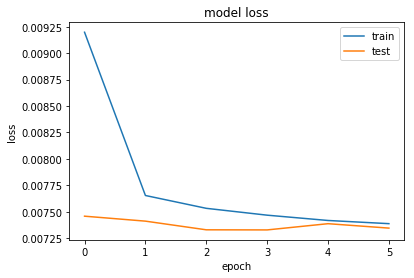

In [39]:
# summarize history for loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [40]:
#Predict on test set
predictions_NN_prob = model.predict(X_test)
predictions_NN_prob = predictions_NN_prob[:,0]

predictions_NN_01 = np.where(predictions_NN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output

In [41]:
#Print accuracy
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc

acc_NN = accuracy_score(Y_test, predictions_NN_01)
print('Overall accuracy of Neural Network model:', acc_NN)

Overall accuracy of Neural Network model: 0.9980526666666667


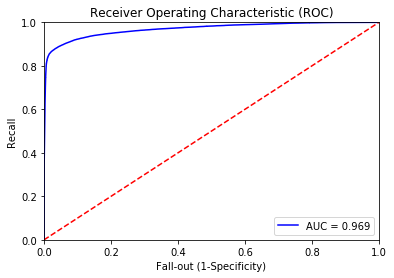

In [42]:
#Print Area Under Curve
false_positive_rate, recall, thresholds = roc_curve(Y_test, predictions_NN_prob)
roc_auc = auc(false_positive_rate, recall)
plt.figure()
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

# Predicting on test.csv and submitting

In [43]:
#The test data to be predicted and submitted has been previously processed
#with the training data.  The rows are rows placed after train_len
     
test_submit = X[train_len:]  
test_submit.shape


(18790469, 4379)

In [44]:
type(test_submit)

scipy.sparse.csr.csr_matrix

In [45]:
%%time
result= model.predict_proba(test_submit)


CPU times: user 15min 41s, sys: 4min 12s, total: 19min 54s
Wall time: 15min 4s


In [46]:
result.shape

(18790469, 1)

In [47]:
write_df=test_data[['click_id']]
write_df.shape


(18790469, 1)

In [48]:
write_df['is_attributed_prob']=result

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [49]:
#del test_df; gc.collect()

write_df.to_csv('test_submit60M.csv', index=False)



In [50]:
write_df.head()

,click_id,is_attributed_prob
0,0,0.000034
1,1,0.000035
2,2,0.000003
3,3,0.000005
4,4,0.000002


In [51]:
write_df.shape

(18790469, 2)

In [52]:
ls -al

total 9881684
drwxrwxr-x  5 ubuntu ubuntu       4096 May 10 19:54 ./
drwxr-xr-x 17 ubuntu ubuntu       4096 May 10 17:05 ../
drwxrwxr-x  2 ubuntu ubuntu       4096 May 10 17:26 checkpoint60M/
drwxrwxr-x  2 ubuntu ubuntu       4096 May 10 16:48 .ipynb_checkpoints/
-rw-rw-r--  1 ubuntu ubuntu      90033 May 10 19:54 Kaggle+-+Neural+Net+with+Sparse+Matrix.ipynb
drwxrwxr-x  3 ubuntu ubuntu       4096 May 10 16:46 mnt/
-rw-rw-r--  1 ubuntu ubuntu       2669 May 10 19:11 Sparse-60M-model.json
-rw-rw-r--  1 ubuntu ubuntu    2304280 May 10 19:11 Sparse-60M-model_weight.h5
-rw-rw-r--  1 ubuntu ubuntu  863271911 May  3 00:11 test.csv
-rw-rw-r--  1 ubuntu ubuntu  412807496 May 10 19:55 test_submit60M.csv
-rw-rw-r--  1 ubuntu ubuntu 7537649302 Feb 16 04:02 train.csv
-rw-rw-r--  1 ubuntu ubuntu 1298591310 May 10 16:44 traincsv.zip
-rw-rw-r--  1 ubuntu ubuntu    4076438 May  3 00:11 train_sample.csv
